In [2]:
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import numpy as np
import hvplot.pandas


ModuleNotFoundError: No module named 'hvplot'

In [1]:
from data_cleaning import *

#load data in dataframes
twitter_df = load_vaccine_csv('./Resources/covidvaccine.csv')
stock_df = load_stock_csv('./Resources/Pfizer.csv')

#Process dataframes
twitter_df = process_twitter_dataframe(twitter_df)
stock_df = process_stock_dataframe(stock_df)
stock_df.head()


/Users/samuelwytenburg/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,return
date,
2020-07-31 05:00:00,0.000000
2020-07-31 05:15:00,0.000516
2020-07-31 05:30:00,0.001032
2020-07-31 06:00:00,0.002577
2020-07-31 06:30:00,0.005398


In [2]:
from tweets_nlp import *

#process tweets with nlp
processed_twitter_df = analyse_sentimemnt_vader(twitter_df)

#further processing
processed_twitter_df = process_tweets(processed_twitter_df, '15min')

processed_twitter_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samuelwytenburg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_econ b2b post,source_happs.tv,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified
date,,,,,,,,,,,,,,,,,,,,,
2020-08-09 19:15:00,89,3108,6780,81.6041,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-09 19:30:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-09 19:45:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-09 20:00:00,225,257,25362,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-09 20:15:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# define cross-correlations 
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [16]:
# check cross-correlations
corr_df = [crosscorr(processed_twitter_df['weighted_compound'],stock_df['return'], lag=i) for i in range(12)]
corr_df

[-0.004697608286801334,
 0.013241833669436076,
 -0.0002475127386726755,
 -0.02373461738830796,
 0.0130941050071125,
 -0.002953141434669865,
 -0.0011515364152285665,
 0.01842748314041251,
 -0.003366155968525101,
 0.008317129187954566,
 -0.03674598678011339,
 -0.013957770897123266]

In [3]:
# Shifting tweets by 2 (30 mins) because that seems to correlate best with stock prices
stock_df = stock_df.shift(-6)
stock_df.dropna(inplace=True)
stock_df.head()

,return
date,
2020-07-31 05:00:00,0.000000
2020-07-31 05:15:00,-0.002564
2020-07-31 05:30:00,-0.001285
2020-07-31 06:00:00,-0.000515
2020-07-31 06:30:00,0.000258


In [4]:
# combine pfizer close price and tweets 
combined_df = pd.concat([processed_twitter_df, stock_df], axis=1, join='inner')
combined_df.head()

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_happs.tv,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified,return
date,,,,,,,,,,,,,,,,,,,,,
2020-08-10 05:30:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000519
2020-08-10 07:15:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000260
2020-08-10 07:30:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000260
2020-08-10 07:45:00,548972,353,1343,-198259.7904,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
2020-08-10 08:00:00,669,3466,11336,203.3200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000259


In [5]:
# Find null values
for column in combined_df.columns:
    print(f"Column {column} has {combined_df[column].isnull().sum()} null values")

Column user_followers has 0 null values
Column user_friends has 0 null values
Column user_favourites has 0 null values
Column weighted_compound has 0 null values
Column source_92 News HD has 0 null values
Column source_@healthpolicyw has 0 null values
Column source_A Touch of Snark has 0 null values
Column source_Africa Newsroom has 0 null values
Column source_AgoraPulse Manager has 0 null values
Column source_Algotiger has 0 null values
Column source_Amplifr has 0 null values
Column source_BLOX CMS has 0 null values
Column source_Bambu by Sprout Social has 0 null values
Column source_Bitly has 0 null values
Column source_Blog2Social APP has 0 null values
Column source_Bradfordian Bot has 0 null values
Column source_Buffer has 0 null values
Column source_CV SNAP  has 0 null values
Column source_Canva has 0 null values
Column source_ChimpReports_ has 0 null values
Column source_Chromographics has 0 null values
Column source_CinchShare has 0 null values
Column source_Cloud Campaign has 0

In [20]:
# classify return column into Boolean value
def changeReturn(returns):
    if returns > 0:
        return 1
    elif returns < 0:
        return -1
    else:
        return 0
combined_df['return_bol'] = combined_df['return'].apply(changeReturn)
combined_df.head()

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified,return,return_bol
date,,,,,,,,,,,,,,,,,,,,,
2020-08-10 05:30:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000519,1
2020-08-10 07:15:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000260,1
2020-08-10 07:30:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000260,1
2020-08-10 07:45:00,548972,353,1343,-198259.7904,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.000000,0
2020-08-10 08:00:00,669,3466,11336,203.3200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000259,1


## Random Forests

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_classification

In [22]:
# Define features set
X = combined_df.copy()
X.drop(["return", 'return_bol'], axis=1, inplace=True)
X.head()

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_econ b2b post,source_happs.tv,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified
date,,,,,,,,,,,,,,,,,,,,,
2020-08-10 05:30:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-10 07:15:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-10 07:30:00,0,0,0,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-10 07:45:00,548972,353,1343,-198259.7904,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-08-10 08:00:00,669,3466,11336,203.3200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Define target vector
y = combined_df["return_bol"].values.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]], dtype=int64)

In [24]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [26]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [27]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [28]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [29]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\Shan\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [30]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual -1", "Actual 0", "Actual 1"], columns=["Predicted -1", "Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted -1,Predicted 0,Predicted 1
Actual -1,299,1,614
Actual 0,50,2,129
Actual 1,278,2,608


Accuracy Score : 0.4583963691376702
Classification Report
              precision    recall  f1-score   support

          -1       0.48      0.33      0.39       914
           0       0.40      0.01      0.02       181
           1       0.45      0.68      0.54       888

    accuracy                           0.46      1983
   macro avg       0.44      0.34      0.32      1983
weighted avg       0.46      0.46      0.42      1983



In [33]:
# Get the feature importance array
importances = rf_model.feature_importances_


In [34]:
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.14555823073922047, 'user_followers'),
 (0.14294303676095696, 'user_favourites'),
 (0.14161883528906102, 'user_friends'),
 (0.13528928905343446, 'weighted_compound'),
 (0.06639618292155128, 'source_Twitter Web App'),
 (0.056892840744166194, 'source_Twitter for iPhone'),
 (0.055399837843962726, 'source_Twitter for Android'),
 (0.027742814003610942, 'source_TweetDeck'),
 (0.026703880127493692, 'source_Hootsuite Inc.'),
 (0.021295881024721807, 'source_Twitter for iPad')]

## Gradiant Boost Tree

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [36]:
# Choose learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=5,
        max_depth=3,
        random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.516
Accuracy score (validation): 0.451

Learning rate:  0.1
Accuracy score (training): 0.521
Accuracy score (validation): 0.455

Learning rate:  0.25
Accuracy score (training): 0.532
Accuracy score (validation): 0.457

Learning rate:  0.5
Accuracy score (training): 0.544
Accuracy score (validation): 0.448

Learning rate:  0.75
Accuracy score (training): 0.551
Accuracy score (validation): 0.448

Learning rate:  1
Accuracy score (training): 0.559
Accuracy score (validation): 0.443



In [37]:
# Create GradientBoostingClassifier model
model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.25,
    max_features=5,
    max_depth=3,
    random_state=0)

# Fit the model
model.fit(X_train_scaled,y_train.ravel())

# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 0.582
Accuracy score (validation): 0.448


In [38]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Generate accuracy score for predictions using y_test
accuracy_score(y_test, predictions)

0.44831064044377206

In [39]:
# Generatring the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual -1", "Actual 0", "Actual 1"], columns=["Predicted -1", "Predicted 0", "Predicted 1"]
)

display(cm_df)

,Predicted -1,Predicted 0,Predicted 1
Actual -1,320,6,588
Actual 0,61,2,118
Actual 1,317,4,567


In [40]:
 # Generate classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.46      0.35      0.40       914
           0       0.17      0.01      0.02       181
           1       0.45      0.64      0.52       888

    accuracy                           0.45      1983
   macro avg       0.36      0.33      0.31      1983
weighted avg       0.43      0.45      0.42      1983



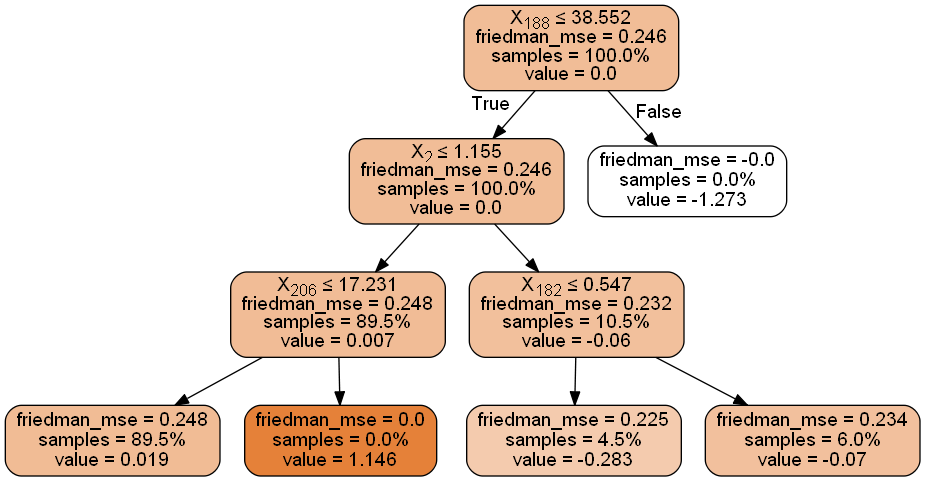

In [41]:
# Graph tree
dot_data = tree.export_graphviz(
    model.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Regression

In [42]:
combined_reg_df = combined_df[['user_followers', 'weighted_compound', 'return']]
combined_reg_df.head()

,user_followers,weighted_compound,return
date,,,
2020-08-10 05:30:00,0,0.0000,0.000519
2020-08-10 07:15:00,0,0.0000,0.000260
2020-08-10 07:30:00,0,0.0000,0.000260
2020-08-10 07:45:00,548972,-198259.7904,0.000000
2020-08-10 08:00:00,669,203.3200,0.000259


In [43]:
def window_data(df, window, feature_col_number, target_col_number, extra_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    Args:
           extra_col_number: the second column, from which we draw only one number - the most recent feature
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = list(df.iloc[i : (i + window), feature_col_number])
        features += [df.iloc[i + window, extra_col_number]]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [44]:
# Predict Closing Prices using a 10 day window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 1 is the 'compound' column
# Column index 2 is the `return` column
extra_col = 1
feature_col = 0
target_col = 2
X, y = window_data(combined_reg_df, window_size, feature_col, target_col, extra_col)

In [45]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]


y_train = y[: split]
y_test = y[split:]

In [46]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [47]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [49]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [50]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [51]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 11, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 11, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 11, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [52]:
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
62/62 [==============================] - 9s 23ms/step - loss: 0.0798
Epoch 2/10
62/62 [==============================] - 1s 24ms/step - loss: 0.0033
Epoch 3/10
62/62 [==============================] - 1s 24ms/step - loss: 0.0027
Epoch 4/10
62/62 [==============================] - 2s 25ms/step - loss: 0.0024: 0s
Epoch 5/10
62/62 [==============================] - 2s 26ms/step - loss: 0.0023
Epoch 6/10
62/62 [==============================] - 1s 23ms/step - loss: 0.0022
Epoch 7/10
62/62 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 8/10
62/62 [==============================] - 1s 22ms/step - loss: 0.0021
Epoch 9/10
62/62 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 10/10
62/62 [==============================] - 1s 22ms/step - loss: 0.0019


In [53]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=1)

75/75 [==============================] - 2s 6ms/step - loss: 0.0114


0.011367701925337315

In [54]:
# Make some predictions
predicted = model.predict(X_test)

In [55]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [56]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = combined_reg_df.index[-len(real_prices): ]) 
stocks.tail()

,Real,Predicted
date,,
2021-02-18 19:00:00,-0.002309,0.005794
2021-02-18 19:15:00,0.002025,0.005794
2021-02-18 19:30:00,-0.000289,0.005795
2021-02-18 19:45:00,0.000578,0.005795
2021-02-18 20:00:00,0.000577,0.005796


In [57]:
# Plot the real vs predicted values as a line chart
stocks.hvplot(title="Actual Vs. Predicted PFE Prices")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

## Algorithmic Trading 

###  Construct Compound Score Signal (Trading Signal, Feature One)

In [58]:
# add close price to combined_reg_df

combined_close_df = combined_df[[ 'weighted_compound', 'return']].join(pfizer_df[['close']])
combined_close_df.head()

,weighted_compound,return,close
date,,,
2020-08-10 05:30:00,0.0000,0.000519,35.733230
2020-08-10 07:15:00,0.0000,0.000260,35.872559
2020-08-10 07:30:00,0.0000,0.000260,35.770384
2020-08-10 07:45:00,-198259.7904,0.000000,35.779673
2020-08-10 08:00:00,203.3200,0.000259,35.761096


In [59]:
# calculate trading signal based on compound score
combined_close_df['weighted_compound_long'] = np.where(combined_close_df['weighted_compound'] > 0.05, 1.0, 0.0)
combined_close_df['weighted_compound_short'] = np.where(combined_close_df['weighted_compound'] < -0.05, -1.0, 0.0)
combined_close_df['sentiment_signal'] = combined_close_df['weighted_compound_long'] + combined_close_df['weighted_compound_short']

In [60]:
combined_close_df.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal
date,,,,,,
2020-08-10 05:30:00,0.0000,0.000519,35.733230,0.0,0.0,0.0
2020-08-10 07:15:00,0.0000,0.000260,35.872559,0.0,0.0,0.0
2020-08-10 07:30:00,0.0000,0.000260,35.770384,0.0,0.0,0.0
2020-08-10 07:45:00,-198259.7904,0.000000,35.779673,0.0,-1.0,-1.0
2020-08-10 08:00:00,203.3200,0.000259,35.761096,1.0,0.0,1.0


###  Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [61]:
# Set short and long windows
short_window = 4
long_window = 16

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
combined_close_df['fast_close'] = combined_close_df['close'].ewm(halflife=short_window).mean()
combined_close_df['slow_close'] = combined_close_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
combined_close_df['crossover_long'] = np.where(combined_close_df['fast_close'] > combined_close_df['slow_close'], 1.0, 0.0)
combined_close_df['crossover_short'] = np.where(combined_close_df['fast_close'] < combined_close_df['slow_close'], -1.0, 0.0)
combined_close_df['crossover_signal'] = combined_close_df['crossover_long'] + combined_close_df['crossover_short']

combined_close_df.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
date,,,,,,,,,,,
2020-08-10 05:30:00,0.0000,0.000519,35.733230,0.0,0.0,0.0,35.733230,35.733230,0.0,0.0,0.0
2020-08-10 07:15:00,0.0000,0.000260,35.872559,0.0,0.0,0.0,35.808915,35.804403,1.0,0.0,1.0
2020-08-10 07:30:00,0.0000,0.000260,35.770384,0.0,0.0,0.0,35.793793,35.792569,1.0,0.0,1.0
2020-08-10 07:45:00,-198259.7904,0.000000,35.779673,0.0,-1.0,-1.0,35.789300,35.789133,1.0,0.0,1.0
2020-08-10 08:00:00,203.3200,0.000259,35.761096,1.0,0.0,1.0,35.781557,35.783029,0.0,-1.0,-1.0


In [62]:
# Plot the EMA of BTC/USD closing prices
combined_close_df[['close', 'fast_close', 'slow_close']].hvplot().opts(width=800, height=400)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

### Construct Bollinger Band (Trading Signal, Feature Three)

In [63]:
# Set bollinger band window
bollinger_window = 96

# Calculate rolling mean and standard deviation
combined_close_df['bollinger_mid_band'] = combined_close_df['close'].rolling(window=bollinger_window).mean()
combined_close_df['bollinger_std'] = combined_close_df['close'].rolling(window=bollinger_window).std()

# Calculate upper and lowers bands of bollinger band
combined_close_df['bollinger_upper_band']  = combined_close_df['bollinger_mid_band'] + (combined_close_df['bollinger_std'] * 1)
combined_close_df['bollinger_lower_band']  = combined_close_df['bollinger_mid_band'] - (combined_close_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
combined_close_df['bollinger_long'] = np.where(combined_close_df['close'] < combined_close_df['bollinger_lower_band'], 1.0, 0.0)
combined_close_df['bollinger_short'] = np.where(combined_close_df['close'] > combined_close_df['bollinger_upper_band'], -1.0, 0.0)
combined_close_df['bollinger_signal'] = combined_close_df['bollinger_long'] + combined_close_df['bollinger_short']

combined_close_df.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,
2020-08-10 05:30:00,0.0000,0.000519,35.733230,0.0,0.0,0.0,35.733230,35.733230,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:15:00,0.0000,0.000260,35.872559,0.0,0.0,0.0,35.808915,35.804403,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:30:00,0.0000,0.000260,35.770384,0.0,0.0,0.0,35.793793,35.792569,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:45:00,-198259.7904,0.000000,35.779673,0.0,-1.0,-1.0,35.789300,35.789133,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 08:00:00,203.3200,0.000259,35.761096,1.0,0.0,1.0,35.781557,35.783029,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [64]:
# Plot the Bollinger Bands for BTC/USD closing prices
combined_close_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].hvplot().opts(width=1000, height=500)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

### Set X-Variable List and Filter to Obtain Associated Values

In [65]:
# Set x variable list of features
x_var_list = ['sentiment_signal', 'crossover_signal', 'bollinger_signal']

# Filter by x-variable list
combined_close_df[x_var_list].head()

,sentiment_signal,crossover_signal,bollinger_signal
date,,,
2020-08-10 05:30:00,0.0,0.0,0.0
2020-08-10 07:15:00,0.0,1.0,0.0
2020-08-10 07:30:00,0.0,1.0,0.0
2020-08-10 07:45:00,-1.0,1.0,0.0
2020-08-10 08:00:00,1.0,-1.0,0.0


In [66]:
# Shift DataFrame values by 1
combined_close_df[x_var_list] = combined_close_df[x_var_list].shift(1)
combined_close_df[x_var_list].head()

,sentiment_signal,crossover_signal,bollinger_signal
date,,,
2020-08-10 05:30:00,NaN,NaN,NaN
2020-08-10 07:15:00,0.0,0.0,0.0
2020-08-10 07:30:00,0.0,1.0,0.0
2020-08-10 07:45:00,0.0,1.0,0.0
2020-08-10 08:00:00,-1.0,1.0,0.0


In [67]:
# Drop NAs and replace positive/negative infinity values
combined_close_df.dropna(subset=x_var_list, inplace=True)
combined_close_df.dropna(subset=['return'], inplace=True)
combined_close_df = combined_close_df.replace([np.inf, -np.inf], np.nan)
combined_close_df.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,
2020-08-10 07:15:00,0.0000,0.000260,35.872559,0.0,0.0,0.0,35.808915,35.804403,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:30:00,0.0000,0.000260,35.770384,0.0,0.0,0.0,35.793793,35.792569,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:45:00,-198259.7904,0.000000,35.779673,0.0,-1.0,0.0,35.789300,35.789133,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 08:00:00,203.3200,0.000259,35.761096,1.0,0.0,-1.0,35.781557,35.783029,0.0,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 08:15:00,0.0000,-0.002983,35.761096,0.0,0.0,1.0,35.776521,35.778967,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [68]:
 # Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
combined_close_df['Positive Return'] = np.where(combined_close_df['return'] > 0, 1.0, 0.0)
combined_close_df.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
date,,,,,,,,,,,,,,,,,,,
2020-08-10 07:15:00,0.0000,0.000260,35.872559,0.0,0.0,0.0,35.808915,35.804403,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2020-08-10 07:30:00,0.0000,0.000260,35.770384,0.0,0.0,0.0,35.793793,35.792569,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2020-08-10 07:45:00,-198259.7904,0.000000,35.779673,0.0,-1.0,0.0,35.789300,35.789133,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2020-08-10 08:00:00,203.3200,0.000259,35.761096,1.0,0.0,-1.0,35.781557,35.783029,0.0,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2020-08-10 08:15:00,0.0000,-0.002983,35.761096,0.0,0.0,1.0,35.776521,35.778967,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [69]:
# Construct training start and end dates
training_start = combined_close_df.index.min().strftime(format= "%Y-%m-%d %H:%M:%S")
training_end = '2021-01-01 20:00:00'

# Construct testing start and end dates
testing_start =  '2021-01-02 04:15:00'
testing_end = combined_close_df.index.max().strftime(format= "%Y-%m-%d %H:%M:%S")

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2020-08-10 07:15:00
Training End: 2021-01-01 20:00:00
Testing Start: 2021-01-02 04:15:00
Testing End: 2021-02-18 20:00:00


In [70]:
# Construct the x train and y train datasets
X_train = combined_close_df[x_var_list][training_start:training_end]
y_train = combined_close_df['Positive Return'][training_start:training_end]

In [71]:
# Construct the x test and y test datasets
X_test = combined_close_df[x_var_list][testing_start:testing_end]
y_test = combined_close_df['Positive Return'][testing_start:testing_end]

In [72]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=78)
model = model.fit(X_train, y_train)

# Make a prediction of "y" values from the x test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

,Positive Return,Predicted Value
date,,
2021-01-04 04:15:00,1.0,0.0
2021-01-04 04:30:00,0.0,0.0
2021-01-04 04:45:00,0.0,0.0
2021-01-04 05:00:00,0.0,0.0
2021-01-04 05:15:00,1.0,0.0
2021-01-04 05:30:00,0.0,0.0
2021-01-04 05:45:00,0.0,0.0
2021-01-04 06:00:00,1.0,0.0
2021-01-04 06:15:00,1.0,0.0


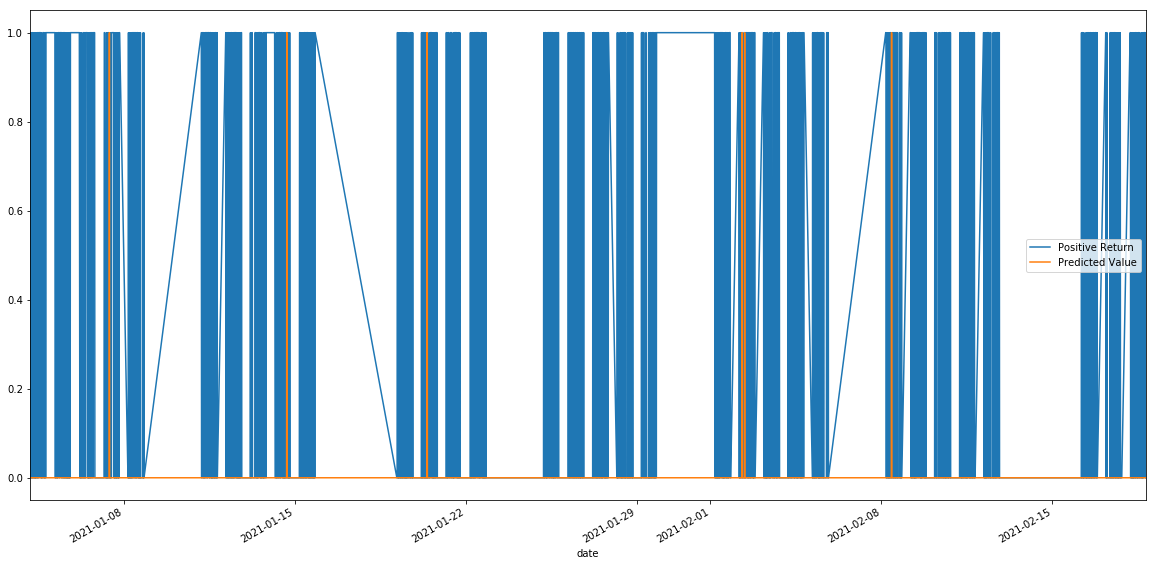

In [73]:
Results[["Positive Return", 'Predicted Value']].plot(figsize=(20,10))

In [74]:
# Replace predicted values 0 to -1 to account for shorting
results = Results.join(combined_close_df['return'])
results['Predicted Value'].replace(0, -1, inplace=True)
results

,Positive Return,Predicted Value,return
date,,,
2021-01-04 04:15:00,1.0,-1.0,0.002157
2021-01-04 04:30:00,0.0,-1.0,0.000000
2021-01-04 04:45:00,0.0,-1.0,0.000000
2021-01-04 05:00:00,0.0,-1.0,-0.000538
2021-01-04 05:15:00,1.0,-1.0,0.000269
2021-01-04 05:30:00,0.0,-1.0,-0.000269
2021-01-04 05:45:00,0.0,-1.0,-0.004577
2021-01-04 06:00:00,1.0,-1.0,0.000541
2021-01-04 06:15:00,1.0,-1.0,0.000270


### Plot Cumulative Returns of Random Forest Model

In [103]:
# Calculate cumulative return of model and plot the result
(1 + (results['return'] * results['Predicted Value'])).cumprod().hvplot(groupby=['index.month','index.day'], widget_type='scrubber', widget_location='bottom')

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=53, width=550)
        [2] HSpacer()

### Plot Cumulative Return of Random Forest Model (In Terms of Capital)

In [92]:
from bokeh.models.formatters import DatetimeTickFormatter
# Set initial capital allocation
initial_capital = 100000
formatter = DatetimeTickFormatter(months='%b %Y')
# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (results['return'] * results['Predicted Value'])).cumprod()


In [98]:
cumulative_return_capital.hvplot(title='Cumulative Capital')

:Curve   [date]   (0)